In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [4]:
#Classical search
myList = [5,4,6,9,1,2,3,7,8,0]

In [5]:
def oracle(number):
    winingNumber = 8
    if number == winingNumber:
        response = True
    else:
        response = False
    return response

In [6]:
for index,number in enumerate(myList):
    if oracle(number) is True:
        print(f"winning number index: {index}")
        print(f"execution count: {index+1}")
        break

winning number index: 8
execution count: 9


In [8]:
#quantum circuit oracle circuit - (winning state = 11)

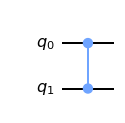

In [11]:
oracleCircuit = QuantumCircuit(2,name= "oracleCircuit")
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')

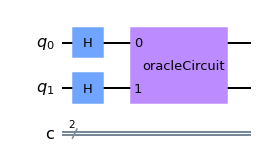

In [13]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

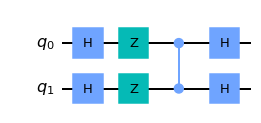

In [16]:
reflectionCircuit = QuantumCircuit(2, name = 'reflection_circuit')
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

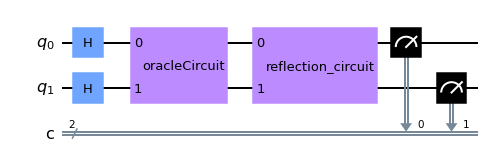

In [17]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

In [18]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit , backend=backend,shots=1).result()
counts = result.get_counts(mainCircuit)

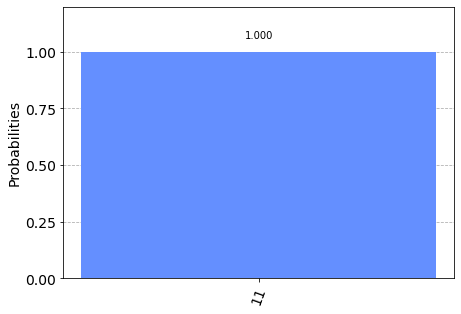

In [19]:
plot_histogram([counts])